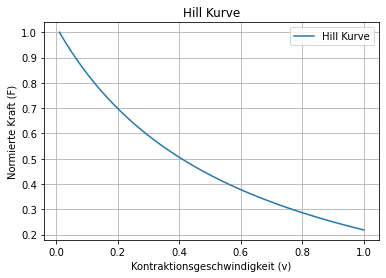

In [2]:

#Hill-Kurve
import matplotlib.pyplot as plt
import numpy as np

# Konstanten definieren
F0 = 1000  # Maximale isometrische Kraft
a = 250    # Elastizitätskonstante
b = 0.59   # Geschwindigkeitskonstante

def Hill_Kurve(v, F0, a, b):
    
    # Hill'sche Gleichung zur Berechnung der Kraft
    
    F = ((F0 + a) * b) / (v + b) - a
    return F

# Geschwindigkeit von 0.01 bis 1.0 in 0.01er Schritten
v_Wert = np.arange(0.01, 1.01, 0.01)

# Kraft für alle Geschwindigkeiten berechnen
F_Wert = Hill_Kurve(v_Wert, F0, a, b)

# Optionale Normierung zur Darstellung
F_Wert_normiert = F_Wert / np.max(F_Wert)

# Plot generieren
plt.plot(v_Wert, F_Wert_normiert, label='Hill Kurve')
plt.xlabel('Kontraktionsgeschwindigkeit (v)')
plt.ylabel('Normierte Kraft (F)')
plt.title('Hill Kurve')
plt.grid()
plt.legend()
plt.show()









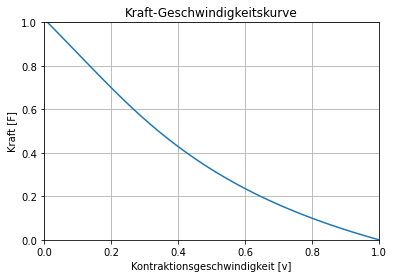

In [3]:

import numpy as np
import matplotlib.pyplot as plt


#Kraft-Geschwindigkeitskurve plotten, siehe Getzlaff Skript S.61-62
def Kraft_geschwindigkeitskurve(v, f1, g1, g2, m, s, k, l, h, phi):
    # Term 1
    term1 = (m * s * k) / (2 * l) * (f1 / (f1 + g1)) * (h ** 2) / 2
    # Term 2
    term2 = (1 - (v / phi) * (1 - np.exp(-phi / v))) * (1 + 0.5 *((f1 + g1)/ g2)**2*(v / phi))
    # Gesamter Ausdruck
    return term1 * term2

# Parameter
f1 = 1
g1 = 3/16
g2 = 3.919
m = 10
s = 1
k = 1
l = 1
h = 1
phi = 1

# Geschwindigkeitswerte
v_values = np.linspace(0.01, 1, 100)  # Start bei 0.01, um Division durch 0 zu vermeiden
force_values = Kraft_geschwindigkeitskurve(v_values, f1, g1, g2, m, s, k, l, h, phi)

# Normierung der Werte 
force_values =(force_values - np.min(force_values))/(np.max(force_values)-np.min(force_values))

# Plot 
plt.plot(v_values, force_values)
plt.xlim(0, 1)
plt.ylim(0, 1)  
plt.xlabel('Kontraktionsgeschwindigkeit [v]')
plt.ylabel('Kraft [F]')
plt.title('Kraft-Geschwindigkeitskurve')
plt.grid(True)
plt.show()


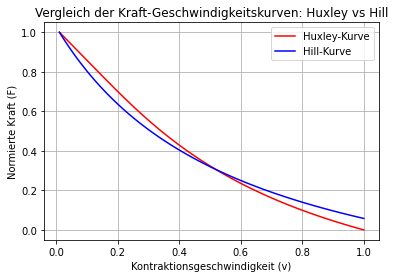

In [18]:
#Gegenüberstellung der Hill- und Kraftgeschwindigkeitskurve 
import numpy as np
import matplotlib.pyplot as plt

# Kraft-Geschwindigkeitskurve nach dem Huxley-Modell
def Kraft_geschwindigkeitskurve(v, f1, g1, g2, m, s, k, l, h, phi):
    # Term 1
    term1 = (m * s * k) / (2 * l) * (f1 / (f1 + g1)) * (h ** 2) / 2
    # Term 2
    term2 = (1 - (v / phi) * (1 - np.exp(-phi / v))) * (1 + 0.5 *((f1 + g1)/ g2)**2*(v / phi))
    # Gesamter Ausdruck
    return term1 * term2

# Parameter für das Huxley-Modell
f1 = 1
g1 = 3/16
g2 = 3.919
m = 10
s = 1
k = 1
l = 1
h = 1
phi = 1

# Geschwindigkeitswerte
v_values = np.linspace(0.01, 1, 100)  # Start bei 0.01, um Division durch 0 zu vermeiden
force_values_huxley = Kraft_geschwindigkeitskurve(v_values, f1, g1, g2, m, s, k, l, h, phi)

# Normierung der Huxley-Kurve
force_values_huxley = (force_values_huxley - np.min(force_values_huxley)) / (np.max(force_values_huxley) - np.min(force_values_huxley))

# Hill-Kurve
F0 = 1000  # Maximale isometrische Kraft
a = 500   # Elastizitätskonstante, wurde angepasst für den Vergleich der Kurven
b = 0.59   # Geschwindigkeitskonstante

def Hill_Kurve(v, F0, a, b):
    # Hill'sche Gleichung zur Berechnung der Kraft
    F = ((F0 + a) * b) / (v + b) - a
    return F

# Geschwindigkeit von 0.01 bis 1.0 in 0.01er Schritten
v_Wert = np.arange(0.01, 1.01, 0.01)

# Kraft für alle Geschwindigkeiten berechnen
F_Wert_hill = Hill_Kurve(v_Wert, F0, a, b)

# Optionale Normierung zur Darstellung der Hill-Kurve
F_Wert_hill_normiert = F_Wert_hill / np.max(F_Wert_hill)

# Plot generieren
plt.plot(v_values, force_values_huxley, 'r-', label='Huxley-Kurve')  # Huxley-Kurve in Rot
plt.plot(v_Wert, F_Wert_hill_normiert, 'b-', label='Hill-Kurve')      # Hill-Kurve in Blau

# Achsenbeschriftungen und Titel
plt.xlabel('Kontraktionsgeschwindigkeit (v)')
plt.ylabel('Normierte Kraft (F)')
plt.title('Vergleich der Kraft-Geschwindigkeitskurven: Huxley vs Hill')

# Gitter und Legende
plt.grid(True)
plt.legend()

# Plot anzeigen
plt.show()




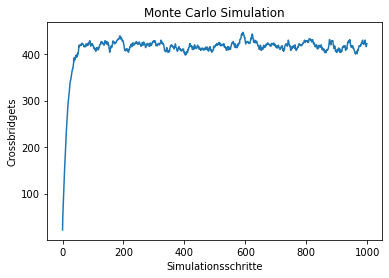

In [6]:
#MonteCarloSimulation von n(x)

import numpy as np
import matplotlib.pyplot as plt

N = 500  # Anzahl der Crossbridges
f = 0.05  # Wahrscheinlichkeit für Attach
g = 0.01  # Wahrscheinlichkeit für Detach
anzahl_zyklen = 1000  # Anzahl der Simulationsschritte

# Initialisierung von N_crossbridges (alle Cross. nicht gebunden)
#wird mit 0en initial. weil am anfang keine gebunden sind 
N_crossbridges = np.zeros(N)

# Listen: Anzahl der cross.im laufe der Simulation abzuspeichern
anzahl_gebundene_cross = []

# Monte Carlo-Simulation
for zyklus in range(anzahl_zyklen):
    # Schleife über N_crossbridges
    for i in range(N):
        if np.random.random() < f:
            N_crossbridges[i] = 1  # Attach
        else:  # ist nicht gebunden
            if N_crossbridges[i] == 1:  #ist gebunden
                if np.random.random() < g:
                    N_crossbridges[i] = 0  # Detach

           
    
    # Anzahl der Crossbridgets speichern
    #hier Ermitlung der Anzahl von gebundenen CB 
    anzahl_gebunden = np.count_nonzero(N_crossbridges)
    anzahl_gebundene_cross.append(anzahl_gebunden)

# Plot erstellen
plt.plot(anzahl_gebundene_cross)
plt.xlabel("Simulationsschritte")
plt.ylabel("Crossbridgets")
plt.title("Monte Carlo Simulation")
plt.show()


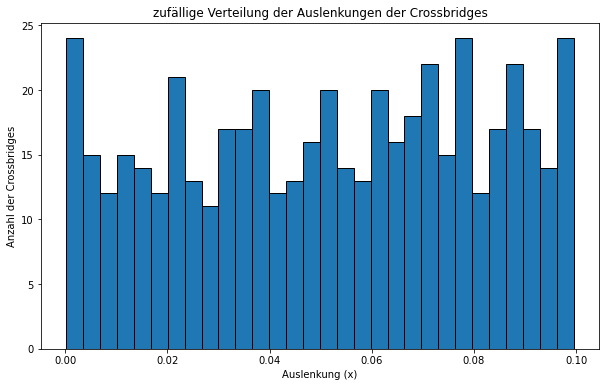

In [7]:

#Hier ein Beispiel mit np.random für gleichmäßige zufällige Verteilung


import numpy as np
import matplotlib.pyplot as plt

N = 500  # Anzahl der Crossbridges (CB)
h = 0.1  # Max. Auslenkung des Myosinkopfes

# Funktion,die die Auslenkung für jede Crossbridge berechnet
def auslenkung_berechnen(N_crossbridges):
    # Zufällige Auslenkung für alle CB
    return np.random.uniform(0, h, N) 

# Funktionen zur Berechnung der Gewichtsfunktionen f(x) und g(x)                                gemäß dem Huxley-Modell siehe S. 58
def f_function(x):
    return x / h  # f(x) für "ATTACH"

def g_function(x):
    return x / h  #g(x) für "DETACH"

# Initialisierung von N_crossbridges (HIER: alle Crossbridges sind nicht gebunden!)
N_crossbridges = np.zeros(N)

# Auslenkung für jede CB
auslenkungen = auslenkung_berechnen(N_crossbridges)

# Zufällige Bindung von CB basierend auf Wahrscheinlichkeit f(x)
for i in range(N):
    if np.random.random() < f_function(auslenkungen[i]):
        N_crossbridges[i] = 1  # Bindung

# Simulation der Bindung und des Loslassens
for _ in range(1000):  # Anzahl der Iterationen, bis ein Gleichgewicht sich einstellt
    for i in range(N):
        if N_crossbridges[i] == 0:  # Wenn nicht gebunden-> entscheiden ob binden
            if np.random.random() < f_function(auslenkungen[i]):
                N_crossbridges[i] = 1  # Bindung
        else:  # Wenn gebunden, entscheiden ob loslassen
            if np.random.random() < g_function(auslenkungen[i]):
                N_crossbridges[i] = 0  # Loslassen


plt.figure(figsize=(10, 6))
plt.hist(auslenkungen, bins=30, edgecolor='black')
plt.xlabel('Auslenkung (x)')
plt.ylabel('Anzahl der Crossbridges')
plt.title('zufällige Verteilung der Auslenkungen der Crossbridges')
plt.show()




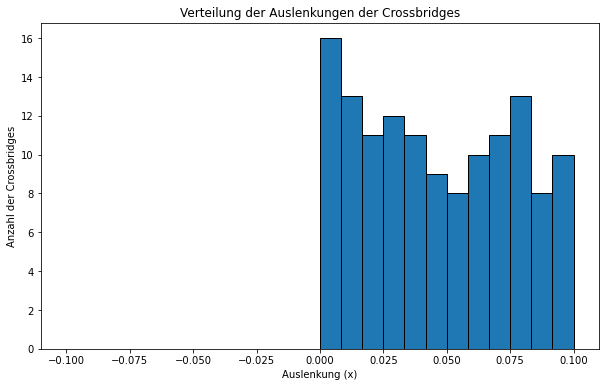

In [8]:


#für gleichmäßige Verteilung np.linspace BENUTZEN!

import numpy as np
import matplotlib.pyplot as plt

N = 500  # Anzahl der Crossbridges (CB)
h = 0.1  # Max. Auslenkung des Myosinkopfes

# Funktion, die die Auslenkung für jede CB berechnet:
def auslenkung_berechnen(N):
    return np.linspace(-h, h, N)  # Gleichmäßige Verteilung der Auslenkungen WEGEN LINSPACE!!

# Funktionen zur Berechnung der Gewichtsfunktionen f(x) und g(x) 
def f_function(x):
    return x / h  # "ATTACH"

def g_function(x):
    return x / h  # "DETACH"

# Initialisierung von N_crossbridges (alle CB sind nicht gebunden)
N_crossbridges = np.zeros(N)

# Berechnung der Auslenkung für jede Crossbridge
auslenkungen = auslenkung_berechnen(N)

# Zufällige Bindung von CB basierend auf Wahrscheinlichkeit f(x)
for i in range(N):
    if np.random.random() < f_function(auslenkungen[i]):
        N_crossbridges[i] = 1  # Bindung

# Simulation der Bindung und des Loslassens
for _ in range(1000):  # Anzahl der Iterationen, bis sich ein Gleichgewicht einstellt
    for i in range(N):
        if N_crossbridges[i] == 0:  # Wenn nicht gebunden, entscheiden ob binden!
            if np.random.random() < f_function(auslenkungen[i]):
                N_crossbridges[i] = 1  # Bindung
        else:  # Wenn gebunden, entscheiden ob loslassen!
            if np.random.random() < g_function(auslenkungen[i]):
                N_crossbridges[i] = 0  # Loslassen




plt.figure(figsize=(10, 6))
plt.hist(auslenkungen[N_crossbridges>0], bins=np.linspace(-h, h, int(N/20)), edgecolor='black')
plt.xlabel('Auslenkung (x)')
plt.ylabel('Anzahl der Crossbridges')
plt.title('Verteilung der Auslenkungen der Crossbridges')
plt.show()


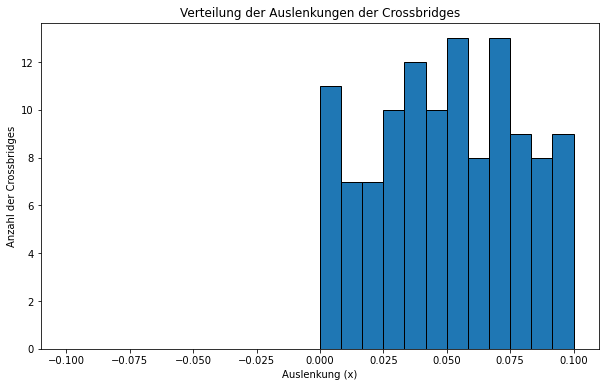

In [9]:
# f=g= 0.5 wurden hier mit berücksichtigt.
#für gleichmäßige Verteilung np.linspace BENUTZEN!

import numpy as np
import matplotlib.pyplot as plt

N = 500  # Anzahl der Crossbridges (CB)
h = 0.1  # Max. Auslenkung des Myosinkopfes
f = 0.5 #Faktor f und g 
g= 0.5

# Funktion, die die Auslenkung für jede CB berechnet:
def auslenkung_berechnen(N):
    return np.linspace(-h, h, N)  # Gleichmäßige Verteilung der Auslenkungen 

# Funktionen zur Berechnung der Gewichtsfunktionen f(x) und g(x) 
def f_function(x):
    return f*(x / h)  # "ATTACH"

def g_function(x):
    return g*(x / h)  # "DETACH"

# Initialisierung von N_crossbridges (alle CB sind nicht gebunden)
N_crossbridges = np.zeros(N)

# Berechnung der Auslenkung für jede Crossbridge
auslenkungen = auslenkung_berechnen(N)

# Zufällige Bindung von CB basierend auf Wahrscheinlichkeit f(x)
for i in range(N):
    if np.random.random() < f_function(auslenkungen[i]):
        N_crossbridges[i] = 1  # Bindung

# Simulation der Bindung und des Loslassens
for _ in range(1000):  # Anzahl der Iterationen, bis sich ein Gleichgewicht einstellt
    for i in range(N):
        if N_crossbridges[i] == 0:  # Wenn nicht gebunden, entscheiden ob binden!
            if np.random.random() < f_function(auslenkungen[i]):
                N_crossbridges[i] = 1  # Bindung
        else:  # Wenn gebunden, entscheiden ob loslassen!
            if np.random.random() < g_function(auslenkungen[i]):
                N_crossbridges[i] = 0  # Loslassen




plt.figure(figsize=(10, 6))
plt.hist(auslenkungen[N_crossbridges>0], bins=np.linspace(-h, h, int(N/20)), edgecolor='black')
plt.xlabel('Auslenkung (x)')
plt.ylabel('Anzahl der Crossbridges')
plt.title('Verteilung der Auslenkungen der Crossbridges')
plt.show()

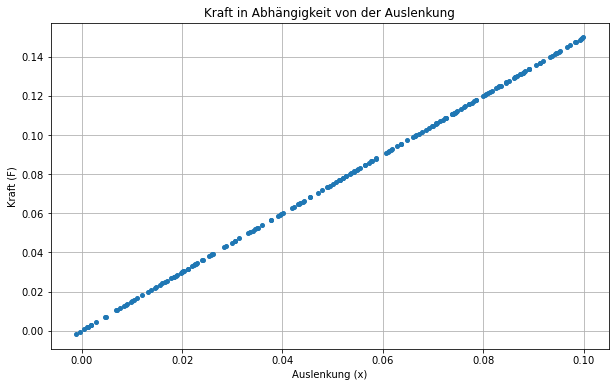

In [12]:

#Die Abhängigkeit von der Kraft F und Auslenkung x 
#Hier werden nur die gebundenen CB berücksichtigt!


import numpy as np
import matplotlib.pyplot as plt

N = 500  # Anzahl der Crossbridges (CB)
h = 0.1  # Max. Auslenkung des Myosinkopfes
k = 1.5  # Federkonstante 
f = 0.8  # Faktor für Bindungswahrscheinlichkeit
g = 0.2  # Faktor für Loslasswahrscheinlichkeit
g2 = 0.1 # Faktor
v = -0.0001  # Geschwindigkeit, verändert für eine stabilere Auslenkung

# Funktion, die die initiale Auslenkung für jede CB berechnet:
def initiale_auslenkung_berechnen(N):
    return np.random.uniform(-h, h, N)  # Zufällige Verteilung innerhalb [-h, h]

# Funktionen zur Berechnung der Gewichtsfunktionen f(x) und g(x)
def f_function(x):
    if x <= 0 or x > h:
        return 0
    return f * (x / h)

def g_function(x):
    if x <= 0:
        return g2  
    return g * (x / h)

# Funktion zur Berechnung der Kraft basierend auf der Auslenkung
def berechne_kraft(x):
    return k * x

# Initialisierung von N_crossbridges (alle CB sind nicht gebunden)
N_crossbridges = np.zeros(N)

# Berechnung der initialen Auslenkung für jede Crossbridge
auslenkungen = initiale_auslenkung_berechnen(N)

# Zufällige Bindung von CB basierend auf Wahrscheinlichkeit f(x)
for i in range(N):
    if -h <= auslenkungen[i] <= h and np.random.random() < f_function(auslenkungen[i]):
        N_crossbridges[i] = 1  # Bindung

# Simulation der Bindung und des Loslassens mit Änderung der Auslenkungen
for step in range(1000):  # Anzahl der Iterationen, bis sich ein Gleichgewicht einstellt
    auslenkungen += v  # Änderung der Auslenkungen pro Zeitschritt
    
    # Negative Auslenkungen umklappen und Crossbridges loslassen
    for i in range(N):
        if auslenkungen[i] < -h:
            auslenkungen[i] = h  # Negative Auslenkung umklappen
            N_crossbridges[i] = 0  # Loslassen

    # Update der Crossbridge-Zustände
    for i in range(N):
        if N_crossbridges[i] == 1:  # Wenn gebunden, entscheiden ob loslassen!
            if np.random.random() < g_function(auslenkungen[i]):
                N_crossbridges[i] = 0  # Loslassen
        else:  # Wenn nicht gebunden, entscheiden ob binden!
            if np.random.random() < f_function(auslenkungen[i]):
                N_crossbridges[i] = 1  # Bindung

# Berechnung der Kräfte nur für gebundene Crossbridges
gebundene_indices = N_crossbridges == 1
gebundene_auslenkungen = auslenkungen[gebundene_indices]
kräfte = berechne_kraft(gebundene_auslenkungen)

# Plot der Kraft in Abhängigkeit von der Auslenkung
plt.figure(figsize=(10, 6))
plt.plot(gebundene_auslenkungen, kräfte, 'o', markersize=4)
plt.xlabel('Auslenkung (x)')
plt.ylabel('Kraft (F)')
plt.title('Kraft in Abhängigkeit von der Auslenkung')
plt.grid(True)
plt.show()

Die Gesamtkraft beträgt: 13.870957386302784
Anzahl der gebundenen Crossbridges: 191.0


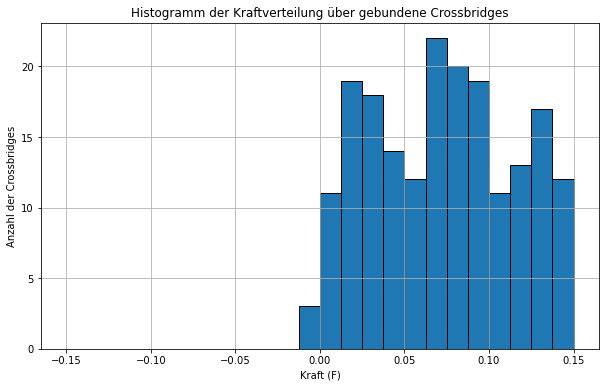

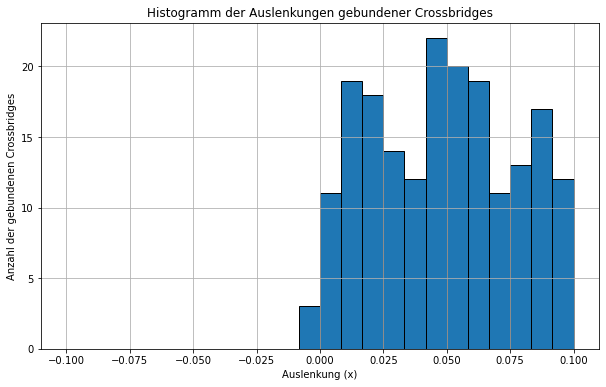

In [13]:
#Kraft und CB Abhängigkeit
#CB und Auslenkung Abhängigkeit

#Plot der Kräfte : Die x-Achse wurde von [-h,h] zu [-kh,+kh] erweitert 
import numpy as np
import matplotlib.pyplot as plt

N = 500  # Anzahl der Crossbridges (CB)
h = 0.1  # Max. Auslenkung des Myosinkopfes
k = 1.5  # Federkonstante 
f = 0.8  # Faktor für Bindungswahrscheinlichkeit
g = 0.2  # Faktor für Loslasswahrscheinlichkeit
g2 = 0.1 # Faktor
v = -0.0001  # Geschwindigkeit, verändert für eine stabilere Auslenkung

# Funktion, die die initiale Auslenkung für jede CB berechnet:
def initiale_auslenkung_berechnen(N):
    return np.random.uniform(-h, h, N)  # Zufällige Verteilung innerhalb [-h, h]

# Funktionen zur Berechnung der Gewichtsfunktionen f(x) und g(x)
def f_function(x):
    if x <= 0 or x > h:
        return 0
    return f * (x / h)

def g_function(x):
    if x <= 0:
        return g2  
    return g * (x / h)

# Funktion zur Berechnung der Kraft basierend auf der Auslenkung
def berechne_kraft(x):
    return k * x 
# Initialisierung von N_crossbridges (alle CB sind nicht gebunden)
N_crossbridges = np.zeros(N)

# Berechnung der initialen Auslenkung für jede Crossbridge
auslenkungen = initiale_auslenkung_berechnen(N)

# Zufällige Bindung von CB basierend auf Wahrscheinlichkeit f(x)
for i in range(N):
    if -h <= auslenkungen[i] <= h and np.random.random() < f_function(auslenkungen[i]):
        N_crossbridges[i] = 1  # Bindung

# Simulation der Bindung und des Loslassens mit Änderung der Auslenkungen
for step in range(1000):  # Anzahl der Iterationen, bis sich ein Gleichgewicht einstellt
    auslenkungen += v  # Änderung der Auslenkungen pro Zeitschritt
    
    # Negative Auslenkungen umklappen und Crossbridges loslassen
    for i in range(N):
        if auslenkungen[i] < -h:
            auslenkungen[i] = h  # Negative Auslenkung umklappen
            N_crossbridges[i] = 0  # Loslassen

    # Update der Crossbridge-Zustände
    for i in range(N):
        if N_crossbridges[i] == 1:  # Wenn gebunden, entscheiden ob loslassen!
            if np.random.random() < g_function(auslenkungen[i]):
                N_crossbridges[i] = 0  # Loslassen
        else:  # Wenn nicht gebunden, entscheiden ob binden!
            if np.random.random() < f_function(auslenkungen[i]):
                N_crossbridges[i] = 1  # Bindung

# Berechnung der Kräfte nur für gebundene Crossbridges
kräfte = berechne_kraft(auslenkungen) * N_crossbridges

# Berechnung der Gesamtkraft
gesamtkraft = np.sum(kräfte)

# Ausgabe der Gesamtkraft
print(f"Die Gesamtkraft beträgt: {gesamtkraft}")

# Anzahl der gebundenen Crossbridges ausgeben
gebundene_cb = np.sum(N_crossbridges)
print(f"Anzahl der gebundenen Crossbridges: {gebundene_cb}")

# **Verbesserung 1**: Histogramm der Kräfte von -kh bis +kh
plt.figure(figsize=(10, 6))
plt.hist(kräfte[N_crossbridges > 0], bins=np.linspace(-k*h, k*h, int(N/20)), edgecolor='black')
plt.xlabel('Kraft (F)') 
plt.ylabel('Anzahl der Crossbridges')
plt.title('Histogramm der Kraftverteilung über gebundene Crossbridges')
plt.grid(True)
plt.show()


# **NEU**: Histogramm der Auslenkungen gebundener Crossbridges
plt.figure(figsize=(10, 6))
plt.hist(auslenkungen[N_crossbridges > 0], bins=np.linspace(-h, h, int(N/20)), edgecolor='black')
plt.xlabel('Auslenkung (x)')
plt.ylabel('Anzahl der gebundenen Crossbridges')
plt.title('Histogramm der Auslenkungen gebundener Crossbridges')
plt.grid(True)
plt.show()


In [ ]:
#Reproduzieren der Hill-Kurve und die n(x) Kurven. (stand: 12.11.24)
#Wichtige Ansätze:
#für verschiedene v müsste die Gesamtkraft gemessen werden und dann beides gegeneinander aufgetragen werden.
# die Paramter f,g und g2 anpassen, damit genügend Brücken in negative Bereiche gezogen werden 


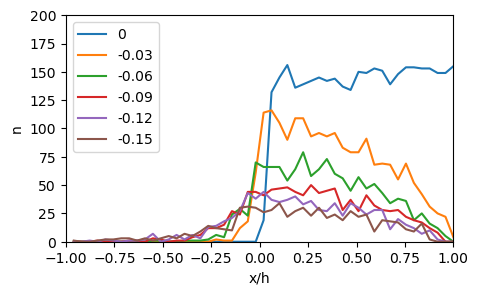

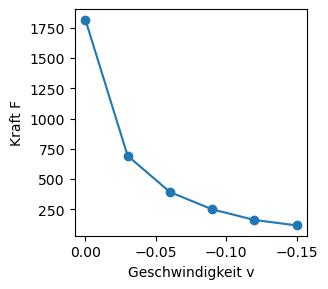

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def huxley(v=0.0):
    
    N      = 10000               # Anzahl der Querbrücken
    f1     = 0.05
    g1     = 0.02
    g2     = 0.5
    steps  = 1000                # Anzahl der Iterationen 

    xl = np.zeros(N)             # binary array für gebunden/ungebunden 
    pos = np.linspace(-1,1,N)    # array für Positionen 

    for s in range(steps):
        
        ib1 = ( (xl>0) & (pos>0));      # Indizes der positiv gebundenen Querbrücken
        ib2 = ( (xl>0) & (pos<=0));     # Indizes der negativ gebundenen Querbrücken

        iu = ( (xl<1) & (pos>0) & (pos<=1));# Indizes der ungebundenen positiven Querbrücken
        r = np.random.random(N)                # Zufallszahlen
        xl[ib1] = ~(r[ib1] < (pos[ib1]*g1))    # detach positive crossbridges
        xl[ib2] = ~(r[ib2] < g2)               # detach negative crossbridges
        xl[iu] = (r[iu] < (pos[iu]*f1))        # attach positive crossbridges
        pos = pos + v                          # Filamente um v verschieben
        out = (pos<-1)                         # Indizes der äußeren Querbrücken
        xl[out] = 0                            # Äußere Querbrücken lösen
        pos[out] = pos[out]+2                  # Äußere CB zur positiven Seite verschieben

    return pos[xl>0]                           # return attached positions


forces = np.zeros(6)                       # Kraft für jede Geschwindigkeit
i=0
velocities = [0,-0.03,-0.06,-0.09,-0.12,-0.15]         # range der Geschwindigkeiten
b = np.linspace(-1,1,50)

plt.figure(figsize=[5,3],dpi=100)

for v in velocities:

    bound = huxley(v)                          # Simulation für diese Geschwindigkeit ausführen
    forces[i] = np.sum(bound)                  # Kraft für diese Geschwindigkeit berechnen
    pos_hist,bins = np.histogram(bound,b)      # plot n(x)
    plt.plot(bins[1:],pos_hist)
    i += 1;

plt.xlim([-1,1])
plt.ylim([0,200])
plt.xlabel('x/h')
plt.ylabel('n')
plt.legend(velocities)
plt.show()

plt.figure(figsize=[3,3],dpi=100)
plt.plot(velocities,forces,'o-')
plt.xlabel('Geschwindigkeit v');
plt.ylabel('Kraft F');
plt.gca().invert_xaxis()


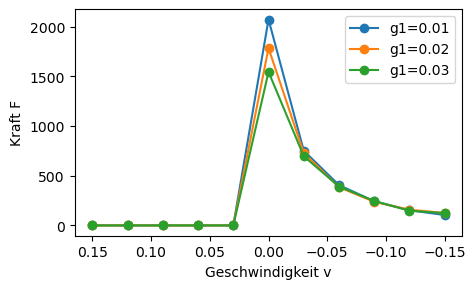

In [15]:
#Varriation mit Paramter g1

import numpy as np 
import matplotlib.pyplot as plt

def huxley(v=0.0, f1=0.05, g1=0.02, g2=0.5):
    N = 10000               # Anzahl der Querbrücken
    steps = 1000            # Anzahl der Iterationen 

    xl = np.zeros(N)        # binary array für gebunden/ungebunden 
    pos = np.linspace(-1, 1, N)  # array für Positionen 

    for s in range(steps):
        ib1 = (xl > 0) & (pos > 0)      # Indizes der positiv gebundenen Querbrücken
        ib2 = (xl > 0) & (pos <= 0)     # Indizes der negativ gebundenen Querbrücken
        iu = (xl < 1) & (pos > 0) & (pos <= 1)  # Indizes der ungebundenen positiven Querbrücken

        r = np.random.random(N)                # Zufallszahlen
        xl[ib1] = ~(r[ib1] < (pos[ib1] * g1))  # detach positive crossbridges
        xl[ib2] = ~(r[ib2] < g2)               # detach negative crossbridges
        xl[iu] = (r[iu] < (pos[iu] * f1))      # attach positive crossbridges

        pos = pos + v                          # Filamente um v verschieben
        out = pos < -1                         # Indizes der äußeren Querbrücken
        xl[out] = 0                            # Äußere Querbrücken lösen
        pos[out] = pos[out] + 2                # Äußere CB zur positiven Seite verschieben

    return pos[xl > 0]  # return attached positions

# Variation von g1
g1_values = [0.01, 0.02, 0.03]  # Verschiedene Werte für g1
velocities = np.concatenate((np.linspace(-0.15, 0, 6), np.linspace(0.03, 0.15, 5)))

plt.figure(figsize=[5, 3], dpi=100)
for g1 in g1_values:
    forces = np.zeros(len(velocities))  # Kraft für jede Geschwindigkeit
    for i, v in enumerate(velocities):
        bound = huxley(v, g1=g1)             # Simulation für diese Geschwindigkeit ausführen
        forces[i] = np.sum(bound)                # Kraft für diese Geschwindigkeit berechnen

    # Plot der Hill-Kurve für jeden g1-Wert
    plt.plot(velocities, forces, 'o-', label=f"g1={g1}")

plt.xlabel('Geschwindigkeit v')
plt.ylabel('Kraft F')
plt.gca().invert_xaxis()

plt.legend()
plt.show()


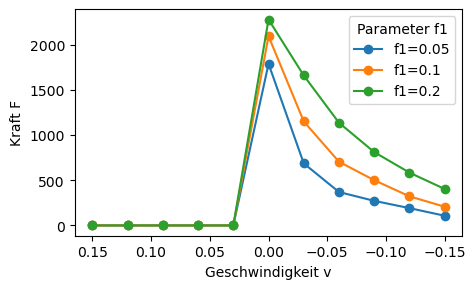

In [16]:
import numpy as np 
import matplotlib.pyplot as plt

def huxley(v=0.0, f1=0.05, g1=0.02, g2=0.5):
    N = 10000               # Anzahl der Querbrücken
    steps = 1000            # Anzahl der Iterationen 

    xl = np.zeros(N)        # Binary array für gebunden/ungebunden 
    pos = np.linspace(-1, 1, N)  # Array für Positionen der Querbrücken

    for s in range(steps):
        ib1 = (xl > 0) & (pos > 0)      # Indizes der positiv gebundenen Querbrücken
        ib2 = (xl > 0) & (pos <= 0)     # Indizes der negativ gebundenen Querbrücken
        iu = (xl < 1) & (pos > 0) & (pos <= 1)  # Indizes der ungebundenen positiven Querbrücken

        r = np.random.random(N)                # Zufallszahlen
        xl[ib1] = ~(r[ib1] < (pos[ib1] * g1))  # Ablösung der positiven Querbrücken
        xl[ib2] = ~(r[ib2] < g2)               # Ablösung der negativen Querbrücken
        xl[iu] = (r[iu] < (pos[iu] * f1))      # Bindung der positiven Querbrücken

        pos = pos + v                          # Verschiebung der Filamente um Geschwindigkeit v
        out = pos < -1                         # Indizes der äußeren Querbrücken
        xl[out] = 0                            # Äußere Querbrücken lösen
        pos[out] = pos[out] + 2                # Äußere Querbrücken zur positiven Seite verschieben

    return pos[xl > 0]  # Zurückgeben der Positionen der gebundenen Querbrücken

# Variation von f1
f1_values = [0.05, 0.1, 0.2]  # Verschiedene Werte für f1
velocities = np.concatenate((np.linspace(-0.15, 0, 6), np.linspace(0.03, 0.15, 5)))             # Geschwindigkeiten

plt.figure(figsize=[5, 3], dpi=100)

# Simulation und Plot für jede f1-Variation
for f1 in f1_values:
    forces = np.zeros(len(velocities))      # Kraft für jede Geschwindigkeit
    for i, v in enumerate(velocities):
        bound = huxley(v, f1=f1)            # Simulation für diese Geschwindigkeit ausführen
        forces[i] = np.sum(bound)           # Kraft für diese Geschwindigkeit berechnen

    # Plot der Hill-Kurve für jeden f1-Wert
    plt.plot(velocities, forces, 'o-', label=f"f1={f1}")

# Achsen und Plot-Einstellungen
plt.xlabel('Geschwindigkeit v')
plt.ylabel('Kraft F')
plt.gca().invert_xaxis()  # Invertiere die x-Achse für die Hill-Kurve

plt.legend(title="Parameter f1")
plt.show()


Näherung von Pi: 3.076


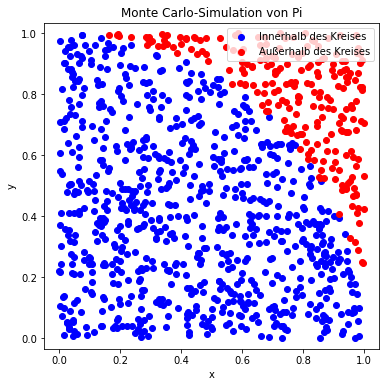

In [17]:
#Zusätzliche Codes zum Verständnis des Themas (wie z.B. Monte-Carlo-Simulationen)

import numpy as np
import matplotlib.pyplot as plt

total = 1000

# Koordinaten generieren
#random punkte im Bereich von 0 bis 1 in einer 2d matirx
points = np.random.rand(total, 2) 

# Entfernungen zum Ursprung berechnen 
#berechnung verwendung von  Satz des Pythagora
distances = np.sqrt(points[:, 0]**2 + points[:, 1]**2)

# Punkte innerhalb des Kreises zählen
#Rs wird gezählt, wie viele Punkte eine Entfernung vom Ursprung kleiner als 1.0 haben
inside = np.sum(distances < 1.0)

# Pi berechnen
pi = (inside / total) * 4

print(f"Näherung von Pi: {pi}")

# Punkte plotten
#Wenn die Entfernung größer oder gleich 1.0 ist, liegt der Punkt außerhalb des Einheitskreises
#für inside werden die x-Koordinaten der Punkte extrahiert, die innerhalb des Einheitskreises liegen
x_inside = points[distances < 1.0, 0]
y_inside = points[distances < 1.0, 1]
x_outside = points[distances >= 1.0, 0]
y_outside = points[distances >= 1.0, 1]

plt.figure(figsize=(6, 6))
plt.scatter(x_inside, y_inside, color='blue', label='Innerhalb des Kreises')
plt.scatter(x_outside, y_outside, color='red', label='Außerhalb des Kreises')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Monte Carlo-Simulation von Pi')
plt.legend()
plt.axis('equal')
plt.show()


Näherung von Pi: 3.028


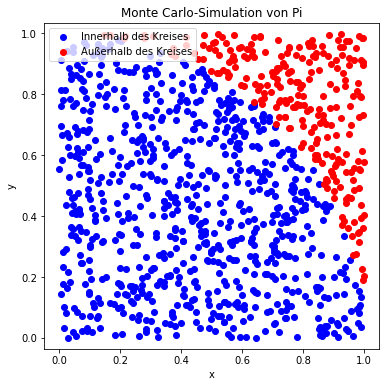

In [18]:
#ALTE MONTE-CARLO-SIM. MIT SCHLEIFEN
import random as r
import numpy as np
import math as m
import matplotlib.pyplot as plt

inside = 0
total = 1000

# Listen zum Speichern der Koordinaten
x_inside = np.array([]) 
y_inside = np.array([]) 
x_outside = np.array([]) 
y_outside = np.array([]) 

for i in np.arange(total):
    x2 = np.random.random()**2
    y2 = np.random.random()**2
    if np.sqrt(x2 + y2) < 1.0:
        inside += 1
        x_inside = np.append(x_inside, np.sqrt(x2))
        y_inside = np.append(y_inside, np.sqrt(y2))
    else:
        x_outside = np.append(x_outside, np.sqrt(x2))
        y_outside = np.append(y_outside, np.sqrt(y2))
        
pi = (float(inside) / total) * 4

print(f"Näherung von Pi: {pi}")

# Punkte plotten
plt.figure(figsize=(6, 6))
plt.scatter(x_inside, y_inside, color='blue', label='Innerhalb des Kreises')
plt.scatter(x_outside, y_outside, color='red', label='Außerhalb des Kreises')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Monte Carlo-Simulation von Pi')
plt.legend()
plt.axis('equal')
plt.show()